c:\Users\marce\OneDrive\Documents\BathLife\Y3\RL\CS1\.venv\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


(4, 128, 64)
0.8888888888888893
False
False
{'speed': 27.500000000000018, 'crashed': False, 'action': [0.5, 0.0], 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.3333333333333333, 'high_speed_reward': np.float64(0.7500000000000018), 'on_road_reward': 1.0}}


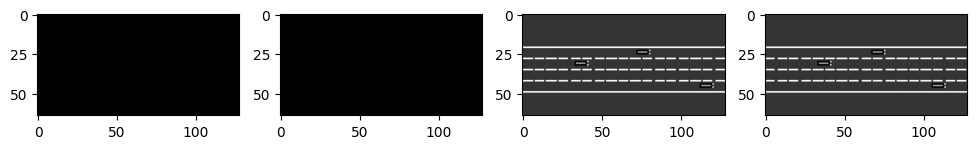

In [1]:
import gymnasium as gym
import highway_env
import matplotlib.pyplot as plt
import torch

env = gym.make('highway-fast-v0', render_mode='rgb_array')


config = {
    "observation": {
        "type": "GrayscaleObservation",
        "observation_shape": (128, 64),
        "stack_size": 4,
        "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
        "scaling": 1.75,
    },
    "action": {
        "type": "ContinuousAction",
        "longitudinal": True,      # Control Gas/Brake
        "lateral": True            # Control Steering
    }
}
env = gym.make('highway-v0', config=config)
obs, info = env.reset()
action = [0.5, 0.0]

for _ in range(1):
    obs, reward, done, truncated, info = env.step(action)

    print(obs.shape)
    print(reward)
    print(done)
    print(truncated)
    print(info)

    fig, axes = plt.subplots(ncols=4, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
plt.show()

In [2]:
from SAC import SAC

# Create a dummy agent
agent = SAC(env, state_size=4)

# Create a fake input batch: 32 images of size 4x128x64
fake_state = torch.randn(32, 4, 128, 64)
fake_action = torch.randn(32, 2)

# 1. Test Actor
print("Testing Actor...")
mu, log_std = agent.actor(fake_state)
print(f"Actor Output Shape: {mu.shape}") # Should be (32, 2)

# 2. Test Critic
print("Testing Critic...")
# Remember Critic takes (State + Action)
q_val = agent.critic_1(fake_state, fake_action) 
print(f"Critic Output Shape: {q_val.shape}") # Should be (32, 1)

print("Dimensions look good!")

Testing Actor...
Actor Output Shape: torch.Size([32, 2])
Testing Critic...
Critic Output Shape: torch.Size([32, 1])
Dimensions look good!


In [3]:
# Main Loop Test
print("Starting Smoke Test...")
agent.collect_data() # Collect 1 episode
print(f"Buffer Size: {len(agent.replayBuffer)}") # Should be > 0

# Try to learn once
print("Attempting to learn...")
agent.learn(batch_size=16) # Small batch for testing
print("Learn step complete.")

Starting Smoke Test...
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

KeyboardInterrupt: 